In [9]:
import forecasting_system.data_access_layer as dal
import forecasting_system.data_processor as dp
import forecasting_system.data_analyser as da
import forecasting_system.modeller as m
import datetime as dt


observation_data = dal.read_data_file('demanddata_2023.csv')
observation_data = dp.format_national_grid_data(observation_data, 'ND')  # demand data is in MW

# create basic calendar variables
observation_data['Day_of_week'] = observation_data.index.to_series().dt.dayofweek
observation_data['Day_of_year'] = observation_data.index.to_series().dt.dayofyear

observation_data.head()

['SETTLEMENT_PERIOD', 'Observation']

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10800     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10851 (42.39 KB)
Trainable params: 10851 (42.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


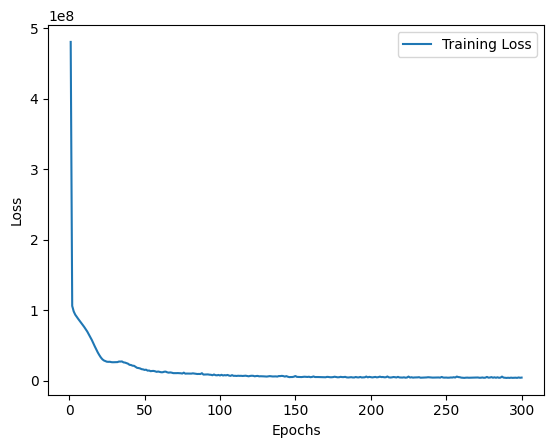

Trained Model (Lstm, {'normalise': False, 'Learning_rate': 0.05, 'Epochs': 300, 'Loss_function': 'mse', 'Plot_loss': True, 'variables': ['SETTLEMENT_PERIOD', 'Day_of_week', 'Day_of_year']}) <keras.src.engine.sequential.Sequential object at 0x00000250D00F8790>


In [6]:
configuration = {
    # # ARIMA options
    # 'lags': 48,
    # 'AR_lags': [1, 2, 48],
    # 'differences': 1,
    # 'MA_lags': 0,
    # LSTM options
    'normalise': False,
    'Learning_rate': 0.05,
    'Epochs': 300,
    'Loss_function': 'mse',
    'Plot_loss': True,
    'variables': ['SETTLEMENT_PERIOD', 'Day_of_week', 'Day_of_year']
}

model = m.create_model('Lstm', configuration)
m.train_model(model, observation_data, '2023-01-01', '2023-03-01')
print(model)

21/21 [==============================] - 0s 650us/step
{'MAE': 2697.7035645258943, 'RMSE': 3386.790816664898, 'MAPE': 0.08595762268022251}


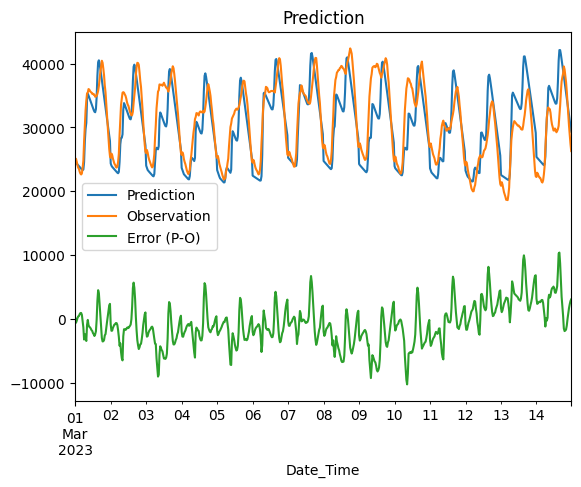

In [5]:
prediction = m.predict_from_model(model, observation_data, '2023-03-01', 48*14, dt.timedelta(minutes=30))
print(prediction.calculate_metrics())
prediction.plot()